In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager
from IPython.core.display import display, HTML
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
# display 설정
display(HTML("<style>.container { width:90% !important; }</style>"))

In [3]:
# 한글 폰트 설정
path= 'c:/Windows/Fonts/malgun.ttf'
font_name= font_manager.FontProperties(fname= path).get_name()
plt.rcParams['font.family']= font_name

# Naver data preprocessing

In [4]:
path2019= 'c:/Users/soohan/bigcontest/dataset/NAVER_GS_DATA_ver1.0/2019_datalab_gs'
path2020= 'c:/Users/soohan/bigcontest/dataset/NAVER_GS_DATA_ver1.0/2020_datalab_gs'

In [5]:
# 첫번째 업종
gs2019_1w= pd.read_excel(path2019+'1_w.xlsx',names= ['DATE','RATIO'], header=None)
gs2020_1w= pd.read_excel(path2020+'1_w.xlsx',names= ['DATE','RATIO'], header=None)

# 두번째 업종
gs2019_2w= pd.read_excel(path2019+'2_w.xlsx',names= ['DATE','RATIO'], header=None)
gs2020_2w= pd.read_excel(path2020+'2_w.xlsx',names= ['DATE','RATIO'], header=None)

# 세번째 업종
gs2019_3w= pd.read_excel(path2019+'3_w.xlsx',names= ['DATE','RATIO'], header=None)
gs2020_3w= pd.read_excel(path2020+'3_w.xlsx',names= ['DATE','RATIO'], header=None)

# 네번째 업종
gs2019_4w= pd.read_excel(path2019+'4_w.xlsx',names= ['DATE','RATIO'], header=None)
gs2020_4w= pd.read_excel(path2020+'4_w.xlsx',names= ['DATE','RATIO'], header=None)

# 다섯번째 업종
gs2019_5w= pd.read_excel(path2019+'5_w.xlsx',names= ['DATE','RATIO'], header=None)
gs2020_5w= pd.read_excel(path2020+'5_w.xlsx',names= ['DATE','RATIO'], header=None)

# 여섯번째 업종
gs2019_6w= pd.read_excel(path2019+'6_w.xlsx',names= ['DATE','RATIO'], header=None)
gs2020_6w= pd.read_excel(path2020+'6_w.xlsx',names= ['DATE','RATIO'], header=None)

# 일곱번째 업종
gs2019_7w= pd.read_excel(path2019+'7_w.xlsx',names= ['DATE','RATIO'], header=None)
gs2020_7w= pd.read_excel(path2020+'7_w.xlsx',names= ['DATE','RATIO'], header=None)

# 여덟번째 업종
gs2019_8w= pd.read_excel(path2019+'8_w.xlsx',names= ['DATE','RATIO'], header=None)
gs2020_8w= pd.read_excel(path2020+'8_w.xlsx',names= ['DATE','RATIO'], header=None)

In [6]:
# Naver데이터 datetime 형태로 변환하기
gs2019_1w.DATE= gs2019_1w.DATE.astype('datetime64')
gs2019_2w.DATE= gs2019_2w.DATE.astype('datetime64')
gs2019_3w.DATE= gs2019_3w.DATE.astype('datetime64')
gs2019_4w.DATE= gs2019_4w.DATE.astype('datetime64')
gs2019_5w.DATE= gs2019_5w.DATE.astype('datetime64')
gs2019_6w.DATE= gs2019_6w.DATE.astype('datetime64')
gs2019_7w.DATE= gs2019_7w.DATE.astype('datetime64')
gs2019_8w.DATE= gs2019_8w.DATE.astype('datetime64')

gs2020_1w.DATE= gs2020_1w.DATE.astype('datetime64')
gs2020_2w.DATE= gs2020_2w.DATE.astype('datetime64')
gs2020_3w.DATE= gs2020_3w.DATE.astype('datetime64')
gs2020_4w.DATE= gs2020_4w.DATE.astype('datetime64')
gs2020_5w.DATE= gs2020_5w.DATE.astype('datetime64')
gs2020_6w.DATE= gs2020_6w.DATE.astype('datetime64')
gs2020_7w.DATE= gs2020_7w.DATE.astype('datetime64')
gs2020_8w.DATE= gs2020_8w.DATE.astype('datetime64')

# GS data preprocessing

In [7]:
# gs total data 불러오기
with open('c:/Users/soohan/bigcontest/dataset/BIGCON_DATA_ver1.2/GS_DATA.bin', 'rb') as f:
    gs = pickle.load(f)

gs_total_data= gs['GS_TOTAL']

In [8]:
# DATE별로 묶고 업종별로 정리하기
gs_total_gb1w_2019= gs_total_data[gs_total_data.YEAR==2019].groupby('DATE').sum()['LCLS_10_P'].reset_index()
gs_total_gb2w_2019= gs_total_data[gs_total_data.YEAR==2019].groupby('DATE').sum()['LCLS_20_P'].reset_index()
gs_total_gb3w_2019= gs_total_data[gs_total_data.YEAR==2019].groupby('DATE').sum()['LCLS_30_P'].reset_index()
gs_total_gb4w_2019= gs_total_data[gs_total_data.YEAR==2019].groupby('DATE').sum()['LCLS_40_P'].reset_index()
gs_total_gb5w_2019= gs_total_data[gs_total_data.YEAR==2019].groupby('DATE').sum()['LCLS_50_P'].reset_index()
gs_total_gb6w_2019= gs_total_data[gs_total_data.YEAR==2019].groupby('DATE').sum()['LCLS_60_P'].reset_index()
gs_total_gb7w_2019= gs_total_data[gs_total_data.YEAR==2019].groupby('DATE').sum()['LCLS_70_P'].reset_index()
gs_total_gb8w_2019= gs_total_data[gs_total_data.YEAR==2019].groupby('DATE').sum()['LCLS_80_P'].reset_index()

gs_total_gb1w_2020= gs_total_data[gs_total_data.YEAR==2020].groupby('DATE').sum()['LCLS_10_P'].reset_index()
gs_total_gb2w_2020= gs_total_data[gs_total_data.YEAR==2020].groupby('DATE').sum()['LCLS_20_P'].reset_index()
gs_total_gb3w_2020= gs_total_data[gs_total_data.YEAR==2020].groupby('DATE').sum()['LCLS_30_P'].reset_index()
gs_total_gb4w_2020= gs_total_data[gs_total_data.YEAR==2020].groupby('DATE').sum()['LCLS_40_P'].reset_index()
gs_total_gb5w_2020= gs_total_data[gs_total_data.YEAR==2020].groupby('DATE').sum()['LCLS_50_P'].reset_index()
gs_total_gb6w_2020= gs_total_data[gs_total_data.YEAR==2020].groupby('DATE').sum()['LCLS_60_P'].reset_index()
gs_total_gb7w_2020= gs_total_data[gs_total_data.YEAR==2020].groupby('DATE').sum()['LCLS_70_P'].reset_index()
gs_total_gb8w_2020= gs_total_data[gs_total_data.YEAR==2020].groupby('DATE').sum()['LCLS_80_P'].reset_index()

In [9]:
# 2019 gs groupby data
gs_total_gb1w_2019.set_index(gs_total_gb1w_2019['DATE'],inplace=True)
gs_total_gb1w_2019= gs_total_gb1w_2019['LCLS_10_P'].resample('W-MON').sum()
gs_total_gb1w_2019 = gs_total_gb1w_2019[1:-1]
gs_total_gb1w_2019 = gs_total_gb1w_2019.rename_axis('DATE').reset_index()

gs_total_gb2w_2019.set_index(gs_total_gb2w_2019['DATE'],inplace=True)
gs_total_gb2w_2019= gs_total_gb2w_2019['LCLS_20_P'].resample('W-MON').sum()
gs_total_gb2w_2019 = gs_total_gb2w_2019[1:-1]
gs_total_gb2w_2019 = gs_total_gb2w_2019.rename_axis('DATE').reset_index()

gs_total_gb3w_2019.set_index(gs_total_gb3w_2019['DATE'],inplace=True)
gs_total_gb3w_2019= gs_total_gb3w_2019['LCLS_30_P'].resample('W-MON').sum()
gs_total_gb3w_2019 = gs_total_gb3w_2019[1:-1]
gs_total_gb3w_2019 = gs_total_gb3w_2019.rename_axis('DATE').reset_index()

gs_total_gb4w_2019.set_index(gs_total_gb4w_2019['DATE'],inplace=True)
gs_total_gb4w_2019= gs_total_gb4w_2019['LCLS_40_P'].resample('W-MON').sum()
gs_total_gb4w_2019 = gs_total_gb4w_2019[1:-1]
gs_total_gb4w_2019 = gs_total_gb4w_2019.rename_axis('DATE').reset_index()

gs_total_gb5w_2019.set_index(gs_total_gb5w_2019['DATE'],inplace=True)
gs_total_gb5w_2019= gs_total_gb5w_2019['LCLS_50_P'].resample('W-MON').sum()
gs_total_gb5w_2019 = gs_total_gb5w_2019[1:-1]
gs_total_gb5w_2019 = gs_total_gb5w_2019.rename_axis('DATE').reset_index()

gs_total_gb6w_2019.set_index(gs_total_gb6w_2019['DATE'],inplace=True)
gs_total_gb6w_2019= gs_total_gb6w_2019['LCLS_60_P'].resample('W-MON').sum()
gs_total_gb6w_2019 = gs_total_gb6w_2019[1:-1]
gs_total_gb6w_2019 = gs_total_gb6w_2019.rename_axis('DATE').reset_index()

gs_total_gb7w_2019.set_index(gs_total_gb7w_2019['DATE'],inplace=True)
gs_total_gb7w_2019= gs_total_gb7w_2019['LCLS_70_P'].resample('W-MON').sum()
gs_total_gb7w_2019 = gs_total_gb7w_2019[1:-1]
gs_total_gb7w_2019 = gs_total_gb7w_2019.rename_axis('DATE').reset_index()

gs_total_gb8w_2019.set_index(gs_total_gb8w_2019['DATE'],inplace=True)
gs_total_gb8w_2019= gs_total_gb8w_2019['LCLS_80_P'].resample('W-MON').sum()
gs_total_gb8w_2019 = gs_total_gb8w_2019[1:-1]
gs_total_gb8w_2019 = gs_total_gb8w_2019.rename_axis('DATE').reset_index()

# 2020 gs groupby data
gs_total_gb1w_2020.set_index(gs_total_gb1w_2020['DATE'],inplace=True)
gs_total_gb1w_2020= gs_total_gb1w_2020['LCLS_10_P'].resample('W-MON').sum()
gs_total_gb1w_2020 = gs_total_gb1w_2020[:-1]
gs_total_gb1w_2020 = gs_total_gb1w_2020.rename_axis('DATE').reset_index()

gs_total_gb2w_2020.set_index(gs_total_gb2w_2020['DATE'],inplace=True)
gs_total_gb2w_2020= gs_total_gb2w_2020['LCLS_20_P'].resample('W-MON').sum()
gs_total_gb2w_2020 = gs_total_gb2w_2020[:-1]
gs_total_gb2w_2020 = gs_total_gb2w_2020.rename_axis('DATE').reset_index()

gs_total_gb3w_2020.set_index(gs_total_gb3w_2020['DATE'],inplace=True)
gs_total_gb3w_2020= gs_total_gb3w_2020['LCLS_30_P'].resample('W-MON').sum()
gs_total_gb3w_2020 = gs_total_gb3w_2020[:-1]
gs_total_gb3w_2020 = gs_total_gb3w_2020.rename_axis('DATE').reset_index()

gs_total_gb4w_2020.set_index(gs_total_gb4w_2020['DATE'],inplace=True)
gs_total_gb4w_2020= gs_total_gb4w_2020['LCLS_40_P'].resample('W-MON').sum()
gs_total_gb4w_2020 = gs_total_gb4w_2020[:-1]
gs_total_gb4w_2020 = gs_total_gb4w_2020.rename_axis('DATE').reset_index()

gs_total_gb5w_2020.set_index(gs_total_gb5w_2020['DATE'],inplace=True)
gs_total_gb5w_2020= gs_total_gb5w_2020['LCLS_50_P'].resample('W-MON').sum()
gs_total_gb5w_2020 = gs_total_gb5w_2020[:-1]
gs_total_gb5w_2020 = gs_total_gb5w_2020.rename_axis('DATE').reset_index()

gs_total_gb6w_2020.set_index(gs_total_gb6w_2020['DATE'],inplace=True)
gs_total_gb6w_2020= gs_total_gb6w_2020['LCLS_60_P'].resample('W-MON').sum()
gs_total_gb6w_2020 = gs_total_gb6w_2020[:-1]
gs_total_gb6w_2020 = gs_total_gb6w_2020.rename_axis('DATE').reset_index()

gs_total_gb7w_2020.set_index(gs_total_gb7w_2020['DATE'],inplace=True)
gs_total_gb7w_2020= gs_total_gb7w_2020['LCLS_70_P'].resample('W-MON').sum()
gs_total_gb7w_2020 = gs_total_gb7w_2020[:-1]
gs_total_gb7w_2020 = gs_total_gb7w_2020.rename_axis('DATE').reset_index()

gs_total_gb8w_2020.set_index(gs_total_gb8w_2020['DATE'],inplace=True)
gs_total_gb8w_2020= gs_total_gb8w_2020['LCLS_80_P'].resample('W-MON').sum()
gs_total_gb8w_2020 = gs_total_gb8w_2020[:-1]
gs_total_gb8w_2020 = gs_total_gb8w_2020.rename_axis('DATE').reset_index()

# MERGE

In [10]:
# 네이버와 gs DATE별로 합치기 (2019)
gsmerge_2019_1w= pd.merge(gs_total_gb1w_2019, gs2019_1w, on='DATE')
gsmerge_2019_2w= pd.merge(gs_total_gb2w_2019, gs2019_2w, on='DATE')
gsmerge_2019_3w= pd.merge(gs_total_gb3w_2019, gs2019_3w, on='DATE')
gsmerge_2019_4w= pd.merge(gs_total_gb4w_2019, gs2019_4w, on='DATE')
gsmerge_2019_5w= pd.merge(gs_total_gb5w_2019, gs2019_5w, on='DATE')
gsmerge_2019_6w= pd.merge(gs_total_gb6w_2019, gs2019_6w, on='DATE')
gsmerge_2019_7w= pd.merge(gs_total_gb7w_2019, gs2019_7w, on='DATE')
gsmerge_2019_8w= pd.merge(gs_total_gb8w_2019, gs2019_8w, on='DATE')

# 네이버와 gs DATE별로 합치기 (2020)
gsmerge_2020_1w= pd.merge(gs_total_gb1w_2020, gs2020_1w, on='DATE')
gsmerge_2020_2w= pd.merge(gs_total_gb2w_2020, gs2020_2w, on='DATE')
gsmerge_2020_3w= pd.merge(gs_total_gb3w_2020, gs2020_3w, on='DATE')
gsmerge_2020_4w= pd.merge(gs_total_gb4w_2020, gs2020_4w, on='DATE')
gsmerge_2020_5w= pd.merge(gs_total_gb5w_2020, gs2020_5w, on='DATE')
gsmerge_2020_6w= pd.merge(gs_total_gb6w_2020, gs2020_6w, on='DATE')
gsmerge_2020_7w= pd.merge(gs_total_gb7w_2020, gs2020_7w, on='DATE')
gsmerge_2020_8w= pd.merge(gs_total_gb8w_2020, gs2020_8w, on='DATE')

# 단순 수치 Graph

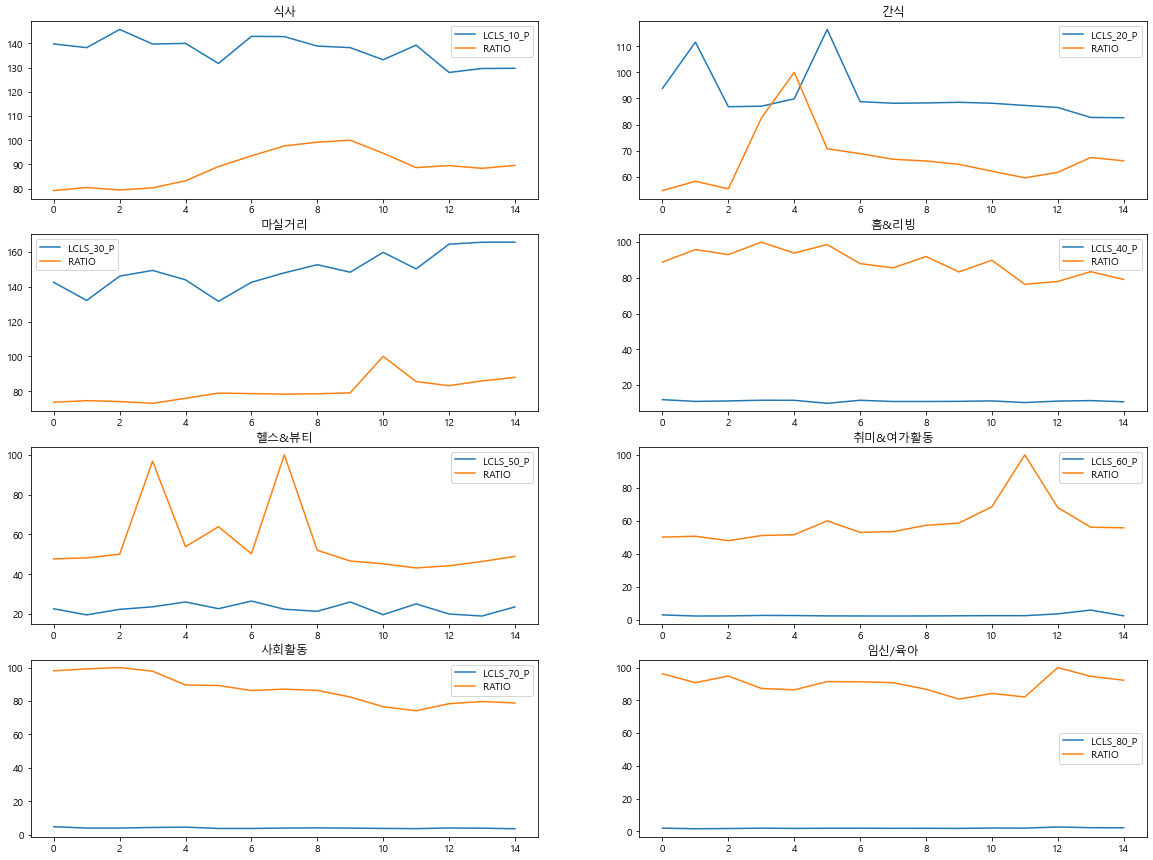

In [11]:
# 단순 수치 그래프로 비교하기 (2019)
fig, axs= plt.subplots(nrows= 4, ncols=2, figsize= (20,15))
axs[0,0].plot(gsmerge_2019_1w.iloc[:,1:])
axs[0,0].set_title('식사')
axs[0,0].legend(gsmerge_2019_1w.iloc[:,1:].columns)
axs[0,1].plot(gsmerge_2019_2w.iloc[:,1:])
axs[0,1].set_title('간식')
axs[0,1].legend(gsmerge_2019_2w.iloc[:,1:].columns)
axs[1,0].plot(gsmerge_2019_3w.iloc[:,1:])
axs[1,0].set_title('마실거리')
axs[1,0].legend(gsmerge_2019_3w.iloc[:,1:].columns)
axs[1,1].plot(gsmerge_2019_4w.iloc[:,1:])
axs[1,1].set_title('홈&리빙')
axs[1,1].legend(gsmerge_2019_4w.iloc[:,1:].columns)
axs[2,0].plot(gsmerge_2019_5w.iloc[:,1:])
axs[2,0].set_title('헬스&뷰티')
axs[2,0].legend(gsmerge_2019_5w.iloc[:,1:].columns)
axs[2,1].plot(gsmerge_2019_6w.iloc[:,1:])
axs[2,1].set_title('취미&여가활동')
axs[2,1].legend(gsmerge_2019_6w.iloc[:,1:].columns)
axs[3,0].plot(gsmerge_2019_7w.iloc[:,1:])
axs[3,0].set_title('사회활동')
axs[3,0].legend(gsmerge_2019_7w.iloc[:,1:].columns)
axs[3,1].plot(gsmerge_2019_8w.iloc[:,1:])
axs[3,1].set_title('임신/육아')
axs[3,1].legend(gsmerge_2019_8w.iloc[:,1:].columns)
plt.show()

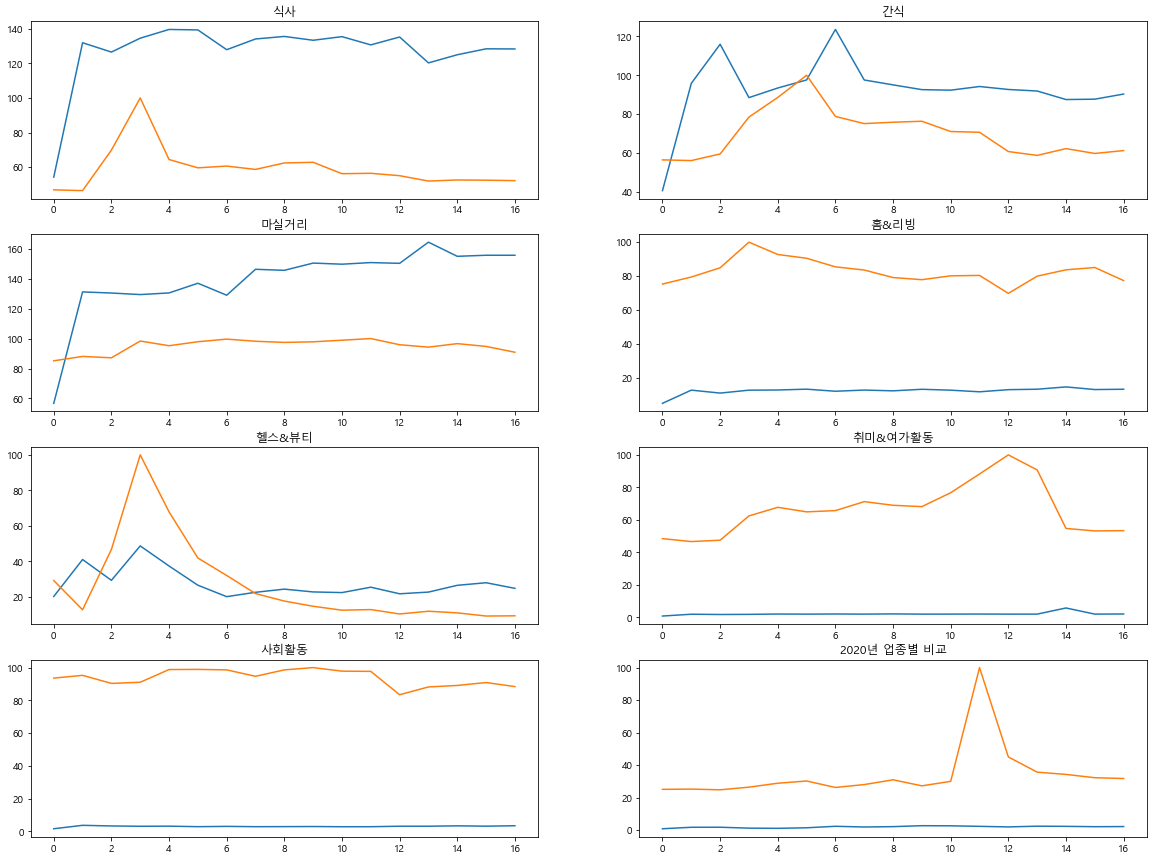

In [12]:
# 단순 수치 그래프로 비교하기 (2020)
fig, axs= plt.subplots(nrows= 4, ncols=2, figsize= (20,15))
axs[0,0].plot(gsmerge_2020_1w.iloc[:,1:])
axs[0,0].set_title('식사')
axs[0,1].plot(gsmerge_2020_2w.iloc[:,1:])
axs[0,1].set_title('간식')
axs[1,0].plot(gsmerge_2020_3w.iloc[:,1:])
axs[1,0].set_title('마실거리')
axs[1,1].plot(gsmerge_2020_4w.iloc[:,1:])
axs[1,1].set_title('홈&리빙')
axs[2,0].plot(gsmerge_2020_5w.iloc[:,1:])
axs[2,0].set_title('헬스&뷰티')
axs[2,1].plot(gsmerge_2020_6w.iloc[:,1:])
axs[2,1].set_title('취미&여가활동')
axs[3,0].plot(gsmerge_2020_7w.iloc[:,1:])
axs[3,0].set_title('사회활동')
axs[3,1].plot(gsmerge_2020_8w.iloc[:,1:])
axs[3,1].set_title('임신/육아')
plt.title('2020년 업종별 비교')
plt.show()

# Regression

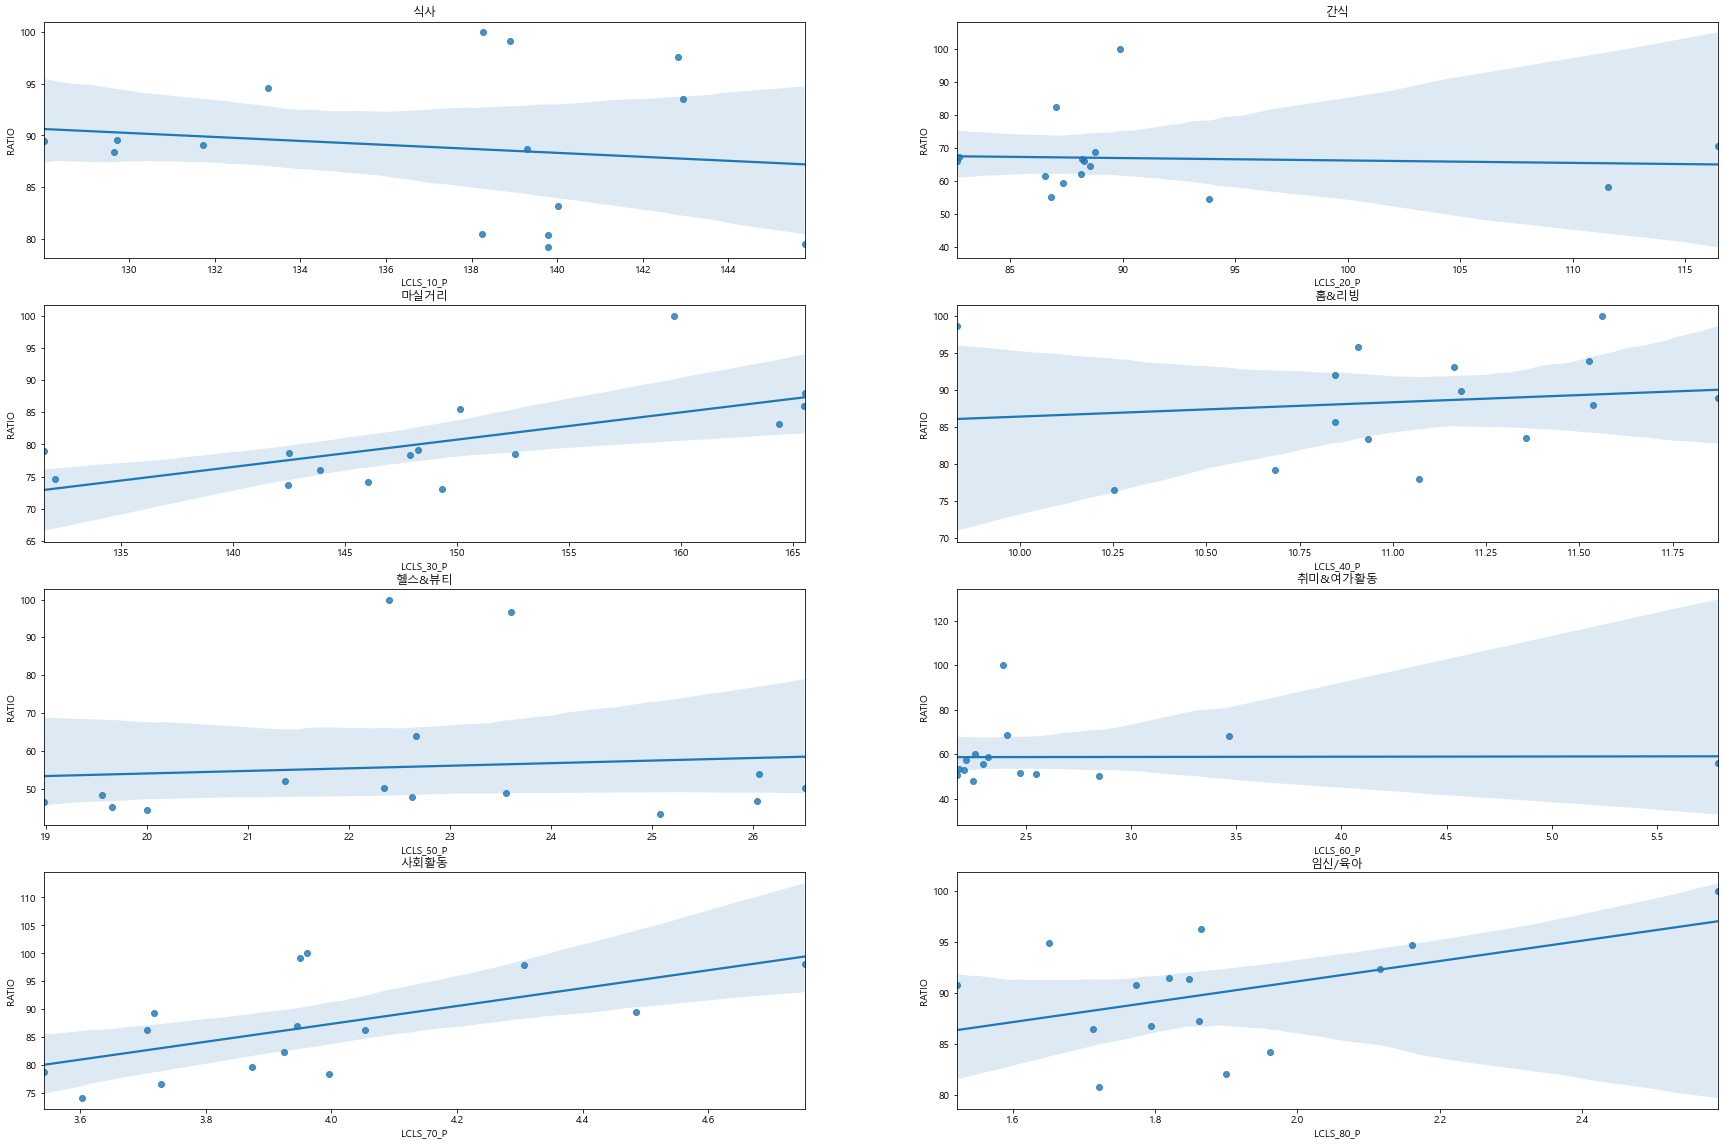

In [13]:
# regression 그래프로 비교하기 (2019)
fig, axes= plt.subplots(nrows=4, ncols=2, squeeze= False)
fig.set_size_inches(30,20)

sns.regplot(x= "LCLS_10_P",y="RATIO", data= gsmerge_2019_1w, ax=axes[0][0])
sns.regplot(x= "LCLS_20_P",y="RATIO", data= gsmerge_2019_2w, ax=axes[0][1])
sns.regplot(x= "LCLS_30_P",y="RATIO", data= gsmerge_2019_3w, ax=axes[1][0])
sns.regplot(x= "LCLS_40_P",y="RATIO", data= gsmerge_2019_4w, ax=axes[1][1])
sns.regplot(x= "LCLS_50_P",y="RATIO", data= gsmerge_2019_5w, ax=axes[2][0])
sns.regplot(x= "LCLS_60_P",y="RATIO", data= gsmerge_2019_6w, ax=axes[2][1])
sns.regplot(x= "LCLS_70_P",y="RATIO", data= gsmerge_2019_7w, ax=axes[3][0])
sns.regplot(x= "LCLS_80_P",y="RATIO", data= gsmerge_2019_8w, ax=axes[3][1])

axes[0][0].set(title= "식사")
axes[0][1].set(title= "간식")
axes[1][0].set(title= "마실거리")
axes[1][1].set(title= "홈&리빙")
axes[2][0].set(title= "헬스&뷰티")
axes[2][1].set(title= "취미&여가활동")
axes[3][0].set(title= "사회활동")
axes[3][1].set(title= "임신/육아")

plt.show()

C:\Users\soohan\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\soohan\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


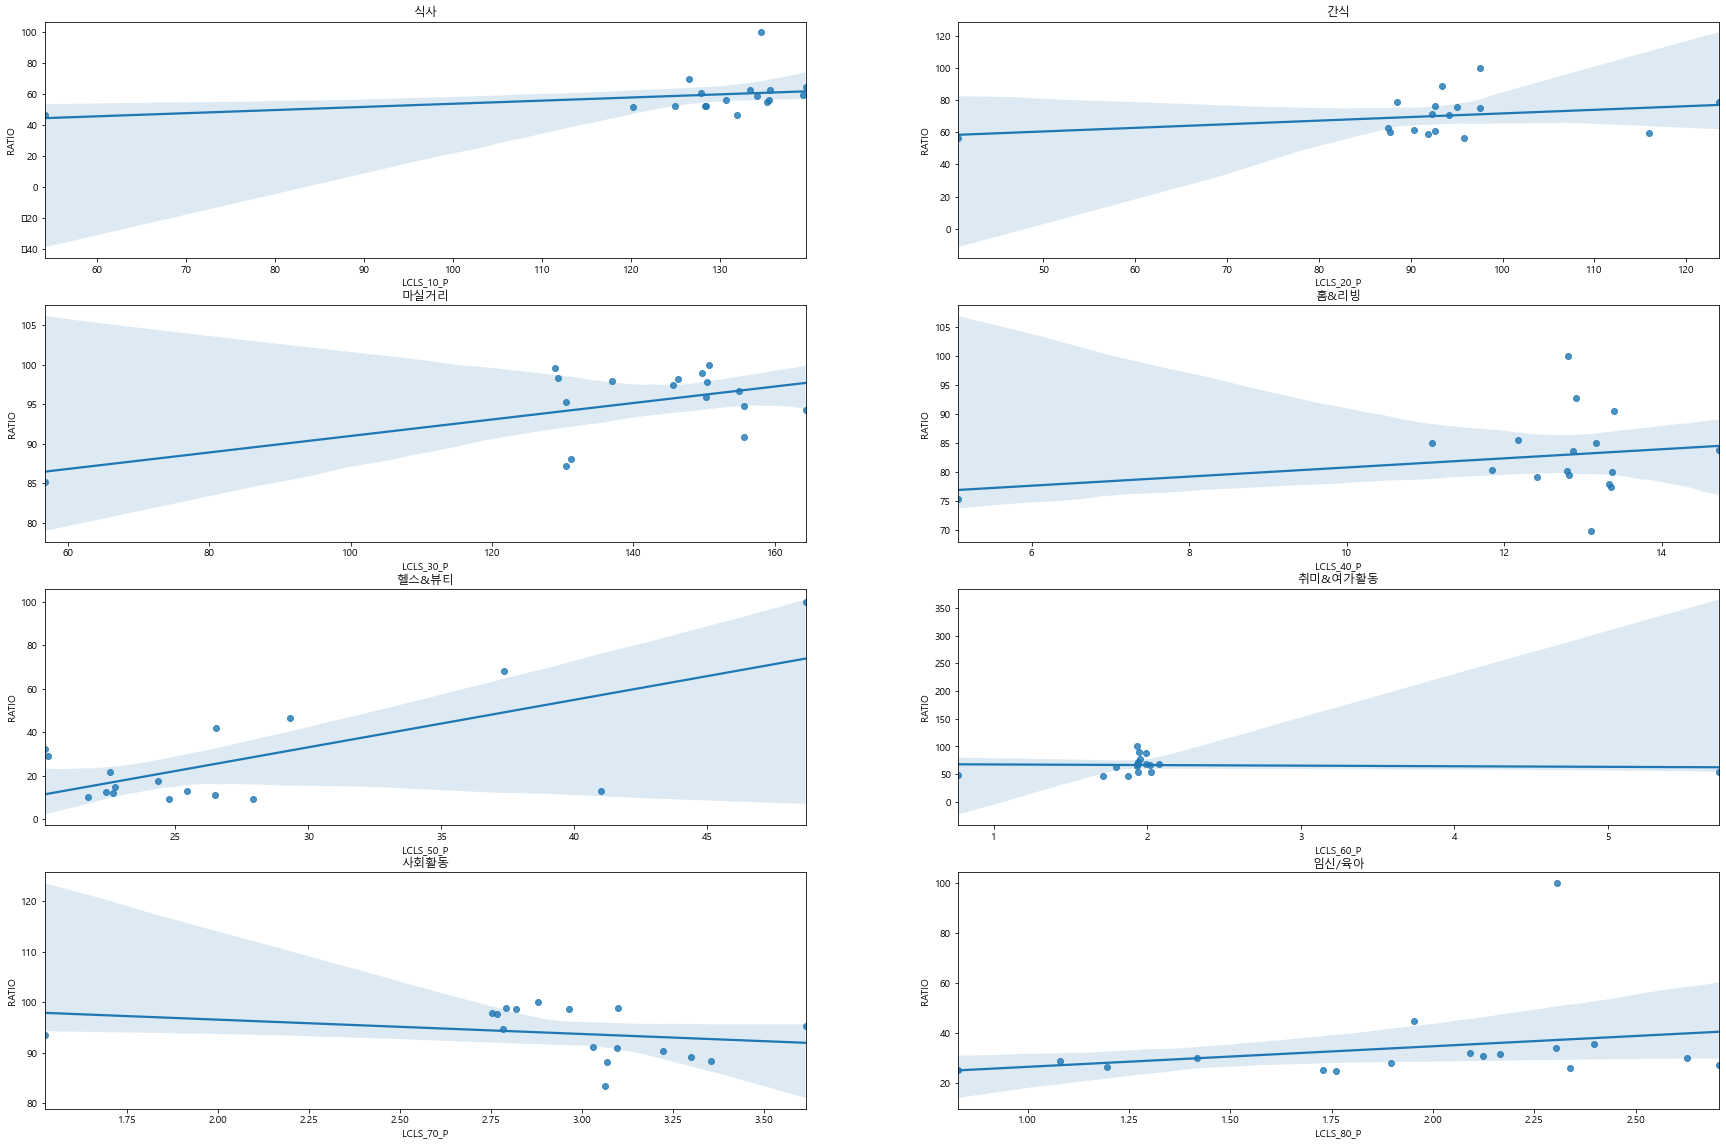

In [14]:
# regression 그래프로 비교하기 (2020)
fig, axes= plt.subplots(nrows=4, ncols=2, squeeze= False)
fig.set_size_inches(30,20)

sns.regplot(x= "LCLS_10_P",y="RATIO", data= gsmerge_2020_1w, ax=axes[0][0])
sns.regplot(x= "LCLS_20_P",y="RATIO", data= gsmerge_2020_2w, ax=axes[0][1])
sns.regplot(x= "LCLS_30_P",y="RATIO", data= gsmerge_2020_3w, ax=axes[1][0])
sns.regplot(x= "LCLS_40_P",y="RATIO", data= gsmerge_2020_4w, ax=axes[1][1])
sns.regplot(x= "LCLS_50_P",y="RATIO", data= gsmerge_2020_5w, ax=axes[2][0])
sns.regplot(x= "LCLS_60_P",y="RATIO", data= gsmerge_2020_6w, ax=axes[2][1])
sns.regplot(x= "LCLS_70_P",y="RATIO", data= gsmerge_2020_7w, ax=axes[3][0])
sns.regplot(x= "LCLS_80_P",y="RATIO", data= gsmerge_2020_8w, ax=axes[3][1])

axes[0][0].set(title= "식사")
axes[0][1].set(title= "간식")
axes[1][0].set(title= "마실거리")
axes[1][1].set(title= "홈&리빙")
axes[2][0].set(title= "헬스&뷰티")
axes[2][1].set(title= "취미&여가활동")
axes[3][0].set(title= "사회활동")
axes[3][1].set(title= "임신/육아")

plt.show()

In [15]:
# 업종별 비율과 검색어 비율과의 관계 (2019)
lm= LinearRegression()
lm.fit(np.array(gsmerge_2019_1w.iloc[:,1]).reshape(-1,1), np.array(gsmerge_2019_1w.iloc[:,2]).reshape(-1,1))
predY_1_19= lm.predict(np.array(gsmerge_2019_1w.iloc[:,1]).reshape(-1,1))
print("식사 업종의 Rsquare:",r2_score(np.array(gsmerge_2019_1w.iloc[:,2]).reshape(-1,1), predY_1_19))

lm2= LinearRegression()
lm2.fit(np.array(gsmerge_2019_2w.iloc[:,1]).reshape(-1,1), np.array(gsmerge_2019_2w.iloc[:,2]).reshape(-1,1))
predY_2_19= lm2.predict(np.array(gsmerge_2019_2w.iloc[:,1]).reshape(-1,1))
print("간식 업종의 Rsquare:",r2_score(np.array(gsmerge_2019_2w.iloc[:,2]).reshape(-1,1), predY_2_19))

lm3= LinearRegression()
lm3.fit(np.array(gsmerge_2019_3w.iloc[:,1]).reshape(-1,1), np.array(gsmerge_2019_3w.iloc[:,2]).reshape(-1,1))
predY_3_19= lm3.predict(np.array(gsmerge_2019_3w.iloc[:,1]).reshape(-1,1))
print("마실거리 업종의 Rsquare:",r2_score(np.array(gsmerge_2019_3w.iloc[:,2]).reshape(-1,1), predY_3_19))

lm4= LinearRegression()
lm4.fit(np.array(gsmerge_2019_4w.iloc[:,1]).reshape(-1,1), np.array(gsmerge_2019_4w.iloc[:,2]).reshape(-1,1))
predY_4_19= lm4.predict(np.array(gsmerge_2019_4w.iloc[:,1]).reshape(-1,1))
print("홈&리빙 업종의 Rsquare:",r2_score(np.array(gsmerge_2019_4w.iloc[:,2]).reshape(-1,1), predY_4_19))

lm5= LinearRegression()
lm5.fit(np.array(gsmerge_2019_5w.iloc[:,1]).reshape(-1,1), np.array(gsmerge_2019_5w.iloc[:,2]).reshape(-1,1))
predY_5_19= lm5.predict(np.array(gsmerge_2019_5w.iloc[:,1]).reshape(-1,1))
print("헬스&뷰티 업종의 Rsquare:",r2_score(np.array(gsmerge_2019_5w.iloc[:,2]).reshape(-1,1), predY_5_19))

lm6= LinearRegression()
lm6.fit(np.array(gsmerge_2019_6w.iloc[:,1]).reshape(-1,1), np.array(gsmerge_2019_6w.iloc[:,2]).reshape(-1,1))
predY_6_19= lm6.predict(np.array(gsmerge_2019_6w.iloc[:,1]).reshape(-1,1))
print("취미&여가활동 업종의 Rsquare:",r2_score(np.array(gsmerge_2019_6w.iloc[:,2]).reshape(-1,1), predY_6_19))

lm7= LinearRegression()
lm7.fit(np.array(gsmerge_2019_7w.iloc[:,1]).reshape(-1,1), np.array(gsmerge_2019_7w.iloc[:,2]).reshape(-1,1))
predY_7_19= lm7.predict(np.array(gsmerge_2019_7w.iloc[:,1]).reshape(-1,1))
print("사회활동 업종의 Rsquare:",r2_score(np.array(gsmerge_2019_7w.iloc[:,2]).reshape(-1,1), predY_7_19))

lm8= LinearRegression()
lm8.fit(np.array(gsmerge_2019_8w.iloc[:,1]).reshape(-1,1), np.array(gsmerge_2019_8w.iloc[:,2]).reshape(-1,1))
predY_8_19= lm8.predict(np.array(gsmerge_2019_8w.iloc[:,1]).reshape(-1,1))
print("임신/육아 업종의 Rsquare:",r2_score(np.array(gsmerge_2019_8w.iloc[:,2]).reshape(-1,1), predY_8_19))

식사 업종의 Rsquare: 0.021206050237145502
간식 업종의 Rsquare: 0.0038882142101629436
마실거리 업종의 Rsquare: 0.4102537929656007
홈&리빙 업종의 Rsquare: 0.019286432522170438
헬스&뷰티 업종의 Rsquare: 0.008894263801171642
취미&여가활동 업종의 Rsquare: 5.357625578572556e-05
사회활동 업종의 Rsquare: 0.3655975995037932
임신/육아 업종의 Rsquare: 0.22056208295667723


In [272]:
# 업종별 비율과 검색어 비율과의 관계 (2020)
lm_2= LinearRegression()
lm_2.fit(np.array(gsmerge_2020_1w.iloc[:,1]).reshape(-1,1), np.array(gsmerge_2020_1w.iloc[:,2]).reshape(-1,1))
predY_1_20= lm_2.predict(np.array(gsmerge_2020_1w.iloc[:,1]).reshape(-1,1))
print("식사 업종의 Rsquare:",r2_score(np.array(gsmerge_2020_1w.iloc[:,2]).reshape(-1,1), predY_1_20))

lm2_2= LinearRegression()
lm2_2.fit(np.array(gsmerge_2020_2w.iloc[:,1]).reshape(-1,1), np.array(gsmerge_2020_2w.iloc[:,2]).reshape(-1,1))
predY_2_20= lm2_2.predict(np.array(gsmerge_2020_2w.iloc[:,2]).reshape(-1,1))
print("간식 업종의 Rsquare:",r2_score(np.array(gsmerge_2020_2w.iloc[:,2]).reshape(-1,1), predY_2_20))

lm3_2= LinearRegression()
lm3.fit(np.array(gsmerge_2020_3w.iloc[:,1]).reshape(-1,1), np.array(gsmerge_2020_3w.iloc[:,2]).reshape(-1,1))
predY_3_20= lm3.predict(np.array(gsmerge_2020_3w.iloc[:,1]).reshape(-1,1))
print("마실거리 업종의 Rsquare:",r2_score(np.array(gsmerge_2020_3w.iloc[:,2]).reshape(-1,1), predY_3_20))

lm4_2= LinearRegression()
lm4_2.fit(np.array(gsmerge_2020_4w.iloc[:,1]).reshape(-1,1), np.array(gsmerge_2020_4w.iloc[:,2]).reshape(-1,1))
predY_4_20= lm4_2.predict(np.array(gsmerge_2020_4w.iloc[:,1]).reshape(-1,1))
print("홈&리빙 업종의 Rsquare:",r2_score(np.array(gsmerge_2020_4w.iloc[:,2]).reshape(-1,1), predY_4_20))

lm5_2= LinearRegression()
lm5_2.fit(np.array(gsmerge_2020_5w.iloc[:,1]).reshape(-1,1), np.array(gsmerge_2020_5w.iloc[:,2]).reshape(-1,1))
predY_5_20= lm5_2.predict(np.array(gsmerge_2020_5w.iloc[:,1]).reshape(-1,1))
print("헬스&뷰티 업종의 Rsquare:",r2_score(np.array(gsmerge_2020_5w.iloc[:,2]).reshape(-1,1), predY_5_20))

lm6_2= LinearRegression()
lm6_2.fit(np.array(gsmerge_2020_6w.iloc[:,1]).reshape(-1,1), np.array(gsmerge_2020_6w.iloc[:,2]).reshape(-1,1))
predY_6_20= lm6_2.predict(np.array(gsmerge_2020_6w.iloc[:,1]).reshape(-1,1))
print("취미&여가활동 업종의 Rsquare:",r2_score(np.array(gsmerge_2020_6w.iloc[:,2]).reshape(-1,1), predY_6_20))

lm7_2= LinearRegression()
lm7_2.fit(np.array(gsmerge_2020_7w.iloc[:,1]).reshape(-1,1), np.array(gsmerge_2020_7w.iloc[:,2]).reshape(-1,1))
predY_7_20= lm7_2.predict(np.array(gsmerge_2020_7w.iloc[:,1]).reshape(-1,1))
print("사회활동 업종의 Rsquare:",r2_score(np.array(gsmerge_2020_7w.iloc[:,2]).reshape(-1,1), predY_7_20))

lm8_2= LinearRegression()
lm8_2.fit(np.array(gsmerge_2020_8w.iloc[:,1]).reshape(-1,1), np.array(gsmerge_2020_8w.iloc[:,2]).reshape(-1,1))
predY_8_20= lm8_2.predict(np.array(gsmerge_2020_8w.iloc[:,1]).reshape(-1,1))
print("임신/육아 업종의 Rsquare:",r2_score(np.array(gsmerge_2020_8w.iloc[:,2]).reshape(-1,1), predY_8_20))

식사 업종의 Rsquare: 0.10538136244694463
간식 업종의 Rsquare: 0.21578903105902292
마실거리 업종의 Rsquare: 0.3010901802221383
홈&리빙 업종의 Rsquare: 0.05228762518166219
헬스&뷰티 업종의 Rsquare: 0.47769907999445593
취미&여가활동 업종의 Rsquare: 0.004573687203597632
사회활동 업종의 Rsquare: 0.06344059024564797
임신/육아 업종의 Rsquare: 0.0634516108943729
